In [1]:
# load the data
words = open('names.txt', 'r').read().splitlines()

In [6]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [98]:
len(words)

32033

In [99]:
b = {}
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        biagram = (ch1, ch2)
        b[biagram] = b.get(biagram, 0) + 1

In [100]:
sorted(b.items(), key = lambda kv: -kv[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [31]:
import torch

In [63]:
N = torch.zeros((27, 27), dtype=torch.int32)

In [103]:
# list of all unique characters
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

In [104]:
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1

In [105]:
N

tensor([[    0,  8820,  2612,  3084,  3380,  3062,   834,  1338,  1748,  1182,
          4844,  5926,  3144,  5076,  2292,   788,  1030,   184,  3278,  4110,
          2616,   156,   752,   614,   268,  1070,  1858],
        [13280,  1112,  1082,   940,  2084,  1384,   268,   336,  4664,  3300,
           350,  1136,  5056,  3268, 10876,   126,   164,   120,  6528,  2236,
          1374,   762,  1668,   322,   364,  4100,   870],
        [  228,   642,    76,     2,   130,  1310,     0,     0,    82,   434,
             2,     0,   206,     0,     8,   210,     0,     0,  1684,    16,
             4,    90,     0,     0,     0,   166,     0],
        [  194,  1630,     0,    84,     2,  1102,     0,     4,  1328,   542,
             6,   632,   232,     0,     0,   760,     2,    22,   152,    10,
            70,    70,     0,     0,     6,   208,     8],
        [ 1032,  2606,     2,     6,   298,  2566,    10,    50,   236,  1348,
            18,     6,   120,    60,    62,   756,   

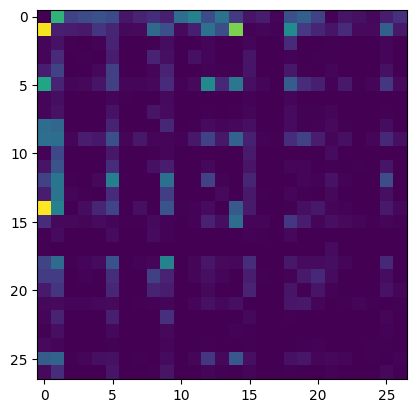

In [106]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(N)

In [107]:
N[0]

tensor([   0, 8820, 2612, 3084, 3380, 3062,  834, 1338, 1748, 1182, 4844, 5926,
        3144, 5076, 2292,  788, 1030,  184, 3278, 4110, 2616,  156,  752,  614,
         268, 1070, 1858], dtype=torch.int32)

In [108]:
p = N[0].float()
p = p / p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [127]:
g  = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]

'c'

In [124]:
torch.multinomial(p, num_samples=20, replacement=True, generator=g)

tensor([10, 19, 11,  1,  5, 26, 25, 10, 11, 13, 19,  1, 10,  4, 14, 16,  2, 13,
         8,  5])